"How can we build a prediction system to detect electric car component failures before they occur?"

## Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Dataset Handling

In [2]:
df = pd.read_csv('engine_data.csv')
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (19535, 7)

Missing Values:
 Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64


In [3]:
# Remove irrelevant columns
features_to_drop = ['timestamp', 'vehicle_id']
for col in features_to_drop:
    if col in df.columns:
        df = df.drop(col, axis=1)

In [4]:
# Handle missing values if any
df = df.dropna()

In [5]:
df = pd.read_csv('engine_data.csv')
print("Columns:", df.columns.tolist())

Columns: ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp', 'Engine Condition']


In [6]:
le = LabelEncoder()
df['Engine Condition'] = le.fit_transform(df['Engine Condition'])


In [7]:
# Split features and target 
X = df.drop('Engine Condition', axis=1)
y = df['Engine Condition']

In [8]:
# Balance classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [9]:
# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [10]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)

Shapes: (17243, 6) (3695, 6) (3696, 6)


In [11]:
# Remove outliers using IQR
def remove_outliers(df, column):
   Q1 = df[column].quantile(0.25)
   Q3 = df[column].quantile(0.75)
   IQR = Q3 - Q1
   df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
   return df

In [12]:
for column in df.columns[:-1]:  # Exclude target column
   df = remove_outliers(df, column)

print("\nShape after cleaning:", df.shape)



Shape after cleaning: (14884, 7)


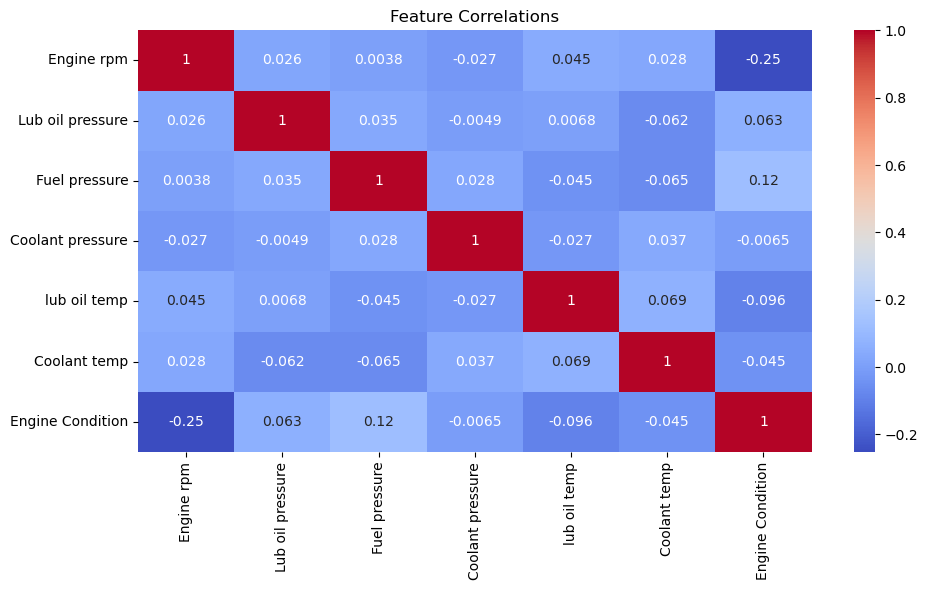

In [13]:
# Basic EDA
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.tight_layout()
plt.show()

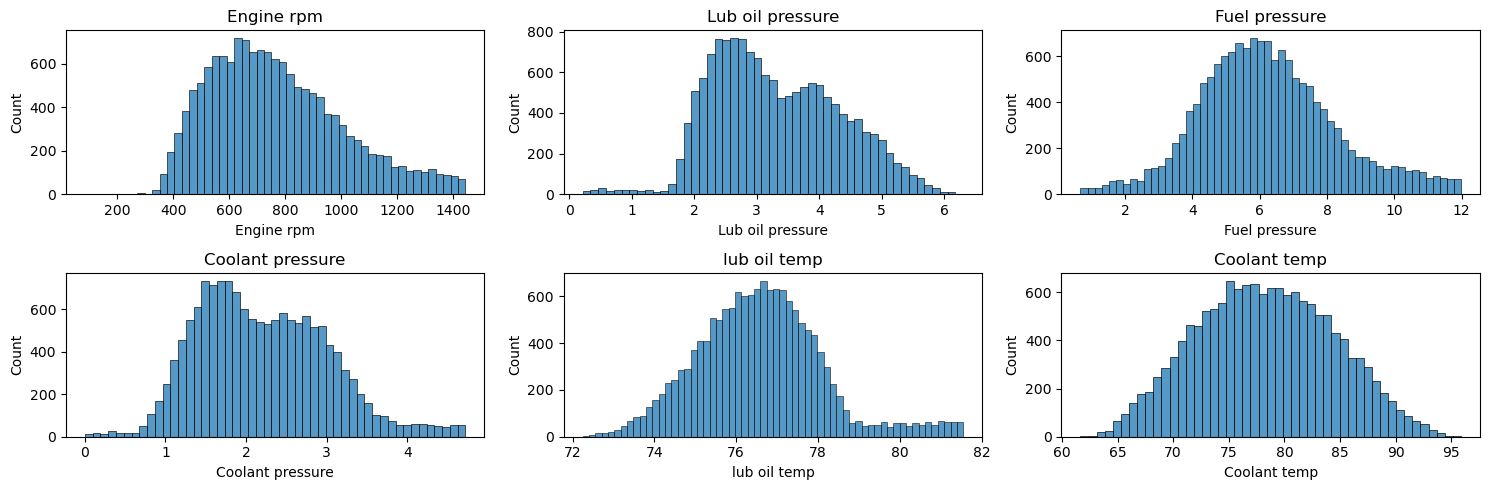

In [14]:
# Distribution plots
plt.figure(figsize=(15, 5))
for i, column in enumerate(df.columns[:-1], 1):
   plt.subplot(2, 3, i)
   sns.histplot(data=df, x=column)
   plt.title(column)
plt.tight_layout()
plt.show()

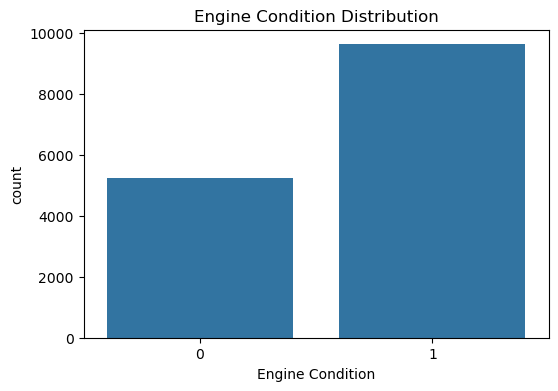


Class distribution:
Engine Condition
1    9627
0    5257
Name: count, dtype: int64


In [15]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Engine Condition')
plt.title('Engine Condition Distribution')
plt.show()

print("\nClass distribution:")
print(df['Engine Condition'].value_counts())

In [16]:
# Load data and check unique values
df = pd.read_csv('engine_data.csv')
print("Engine Condition categories:", df['Engine Condition'].unique())
print("\nCount of each category:")
print(df['Engine Condition'].value_counts())

Engine Condition categories: [1 0]

Count of each category:
Engine Condition
1    12317
0     7218
Name: count, dtype: int64


Sigmoid and Relu

## Dense Layer

In [17]:
class Dense_layer:
    """
    This class is used to define the dense layer in Neural Networks. 
    This included forward and backward propagation.
    """
    
    def __init__(self, n_inputs, n_neurons):
        """
        n_inputs: Number of inputs.
        n_neurons: Number of neurons in the layer

        Weights are defined with random values.
        Biases are defined as zeros.
        """
        self.weights = np.random.rand(n_inputs, n_neurons)  # randomly initialized weights
        self.biases = np.zeros((1, n_neurons)) # biases intialized as zeros

    def forward_propagation(self, input_layer):
        self.input_layer = input_layer
        self.output_layer = np.dot(input_layer, self.weights) + self.biases
        return self.output_layer
    
    def backward_propagation(self, output_error, learning_rate):
        self.d_weights = np.dot(self.input_layer.T, output_error) / self.input_layer.shape[0]
        self.d_biases = np.sum(output_error, axis=0, keepdims=True) / self.input_layer.shape[0]
        self.d_inputs = np.dot(output_error, self.weights.T)

        # Update weights and biases
        self.weights -= learning_rate * self.d_weights
        self.biases -= learning_rate * self.d_biases

        return self.d_inputs

## Sigmoid - Activation Function

In [18]:
class Sigmoid:
    """ 
    This class represents the sigmoid activation function.
    """
    def __init__(self):
        pass
    
    def forward_propagation(self, input):
        self.inputs = input
        self.output = 1 / (1 + np.exp(-input))
        return self.output
    
    def backward_propagation(self, output_error):
        return output_error * (self.output * (1 - self.output))

## Relu Activation Function

In [19]:
class Relu:
    """ 
    This class is for define Rectified Linear Unit (Relu) activation funciton.
    """
    def __init__(self):
        pass
    
    def forward_propagation(self, input):
        self.input = input
        self.output = np.maximum(0, input)
        return self.output
    
    def backward_propagation(self, output_error):
        return output_error * (self.output > 0).astype(float)

## Softmax - Activation Function

In [20]:
class Softmax:
    """ 
    This class is for define Softmax activation funciton.
    """
    def __init__(self):
        pass
    
    def forward_propagation(self, input):
        self.input = input
        ex = np.exp(input - np.max(input, axis=1, keepdims=True))
        self.output = ex / np.sum(ex, axis=1, keepdims=True)
        return self.output
    
    def backward_propagation(self, output_error):
        return output_error

## Dropout

In [21]:
class Dropout:
    def __init__(self, dropout_probabality):
        self.dropout_probabality = dropout_probabality
        self.mask = None

    def forward_propagation(self, input):
        if self.dropout_probabality < 1.0:
            self.mask = (np.random.rand(*input.shape) >
                         self.dropout_probabality) / (1 - self.dropout_probabality)

            return input * self.mask
        return input

    def backward_propagation(self, output_error):
        if self.dropout_probabality < 1.0:
            return output_error * self.mask
        return output_error

## Neural Network

In [22]:
class Neural_network:
   def __init__(self):
       self.layers = []

   def add_layer(self, layer, activation_func=None, dropout=None):
       self.layers.append(
           {"layer": layer, "activation_func": activation_func, "dropout": dropout})

   def forward_propagation(self, X):
       self.input = X
       for layer_details in self.layers:
           X = layer_details["layer"].forward_propagation(X)
           if layer_details["activation_func"] is not None:
               X = layer_details["activation_func"].forward_propagation(X)
           if layer_details["dropout"] is not None:
               X = layer_details["dropout"].forward_propagation(X)
       self.output = X
       return self.output

   def backward_propagation(self, output_error, learning_rate):
       for layer_details in reversed(self.layers):
            if layer_details["dropout"]:
                output_error = layer_details["dropout"].backward_propagation(
                    output_error)
            if layer_details["activation_func"]:
                output_error = layer_details["activation_func"].backward_propagation(
                    output_error)
            output_error = layer_details["layer"].backward_propagation(
               output_error, learning_rate)

   def train(self, X, y, learning_rate, epochs, batch_size=32):
        for epoch in range(epochs):
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                predictions = self.forward_propagation(X_batch)
                #categorical cross-entropy loss
                loss = - \
                    np.mean(np.sum(y_batch * np.log(predictions + 1e-7), axis=1))
                output = predictions - y_batch
                self.backward_propagation(output, learning_rate)

            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

   def predict(self, X):
        prediction = self.forward_propagation(X)
        return np.argmax(prediction, axis=1)

In [23]:
nn = Neural_network()
nn.add_layer(Dense_layer(X_train.shape[1], 16), Relu(), Dropout(0.05))
nn.add_layer(Dense_layer(16, 8), Relu(), Dropout(0.05))
nn.add_layer(Dense_layer(8, 4), Softmax())

## Testing

In [24]:
# Example Usage (Iris Dataset)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load and preprocess data
iris = load_iris()
X = iris.data
y = iris.target
encoder = OneHotEncoder()
y_one_hot = encoder.fit_transform(y.reshape(-1, 1)).toarray()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_one_hot, test_size=0.2, random_state=42)

# Initialize and train neural network
nn = Neural_network()
nn.add_layer(Dense_layer(4, 10), Relu(), Dropout(dropout_probabality=0.1))
nn.add_layer(Dense_layer(10, 3), Softmax())

nn.train(X_train, y_train, epochs=1000, learning_rate=0.01,)

# Evaluate
predictions = nn.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/1000, Loss: 0.8547
Epoch 2/1000, Loss: 0.8367
Epoch 3/1000, Loss: 0.8267
Epoch 4/1000, Loss: 0.8067
Epoch 5/1000, Loss: 0.8557
Epoch 6/1000, Loss: 0.8650
Epoch 7/1000, Loss: 0.8439
Epoch 8/1000, Loss: 0.7947
Epoch 9/1000, Loss: 0.8312
Epoch 10/1000, Loss: 0.8182
Epoch 11/1000, Loss: 0.7852
Epoch 12/1000, Loss: 0.8075
Epoch 13/1000, Loss: 0.7879
Epoch 14/1000, Loss: 0.8060
Epoch 15/1000, Loss: 0.7779
Epoch 16/1000, Loss: 0.8186
Epoch 17/1000, Loss: 0.8068
Epoch 18/1000, Loss: 0.7983
Epoch 19/1000, Loss: 0.7595
Epoch 20/1000, Loss: 0.7974
Epoch 21/1000, Loss: 0.7971
Epoch 22/1000, Loss: 0.7560
Epoch 23/1000, Loss: 0.7772
Epoch 24/1000, Loss: 0.7707
Epoch 25/1000, Loss: 0.7663
Epoch 26/1000, Loss: 0.7798
Epoch 27/1000, Loss: 0.7609
Epoch 28/1000, Loss: 0.7601
Epoch 29/1000, Loss: 0.7671
Epoch 30/1000, Loss: 0.7258
Epoch 31/1000, Loss: 0.7584
Epoch 32/1000, Loss: 0.7426
Epoch 33/1000, Loss: 0.7628
Epoch 34/1000, Loss: 0.7641
Epoch 35/1000, Loss: 0.7518
Epoch 36/1000, Loss: 0.7576
E

## Data Preprocessing, Balancing, and Scaling for Air Quality Prediction

Loading the dataset and feature selection

In [26]:
df = pd.read_csv("updated_pollution_dataset.csv")

X = df.drop("Air Quality", axis=1).values
y = df["Air Quality"].values

One-hot encoding of the target variable

In [27]:
encoder = OneHotEncoder()
y_one_hot = encoder.fit_transform(y.reshape(-1, 1)).toarray()

Balancing the dataset using SMOTE

In [28]:
# Balance classes using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, np.argmax(y_one_hot, axis=1))

In [29]:
# Convert y_balanced back to numeric values (already integers after SMOTE)
y_balanced = np.array(y_balanced).reshape(-1, 1)

In [30]:
# One-hot encode the balanced target
y_balanced = encoder.fit_transform(y_balanced).toarray()